# Supplementary Jupyter notebook

This notebook demonstrate use of Python __[APSG package](https://github.com/ondrolexa/apsg)__ for calculation presented in the submitted manuscript.

In [1]:
%pylab inline
from IPython.display import HTML

Populating the interactive namespace from numpy and matplotlib


In [2]:
from apsg import *
settings['figsize'] = (10, 8)

### Definition of model parameter
Here we define number of fabric elements `N`, reference strain rate `sr`, total time of simulation `tot_time` and number of steps `steps`. We use random normal distribution for initial planar and linear fabrics. See `Group.randn_fol` and `Group.randn_lin` methods of APSG.

In [3]:
############## HER YOU CAN MODIFY MODEL PARAMETERS ######################
N = 300                                    # number of fols or lins
sr = 3e-14                                 # strain rate
steps = 100                                # number of iterations
tot_time = 2                               # time of model run in Ma
S2 = Group.randn_fol(N, Fol(90, 90))       # initial planar fabrics
L3 = Group.randn_lin(N, Lin(180, 0))       # initial linear fabrics
#########################################################################
Mas = 365.25*24*3600*1e6                   # million years in seconds
tsteps = linspace(0, tot_time*Mas, steps)  # array of timesteps

Orientation of deformation kinematic frame is parametrized in terms of "fabric attractor" `Atr` defined here. Pole of fabric attractor foliation correspond to Z axis and fabric attractor lineation correspond to X axis of deformation kinematic frame.

In [4]:
Atr = Pair(105, 30, 105, 30)
print('Corrected attractor pair: {}'.format(Atr))

Corrected attractor pair: P:105/30-105/30


Velocity gradient tensor `L` is defined within deformation zone coordinate system and than rotated to coordinates defined by fabric attractor.

<img src='Fig12_model_definition4.png' width='50%'>

In [5]:
R = DefGrad.from_pair(Atr)
L = VelGrad.from_comp(zz=-sr/2, yy=-sr/2, xx=sr, xz=-sr).rotate(R)

Deformation gradient `F` is calculated from velocity gradient `L` according to equation: $\mathbf{F}=\mathrm{e}^{\mathbf{L}t}$

In [6]:
F = L.defgrad(time=tot_time*Mas)

Now we can plot initial and final fabric distribution in stereographic projection

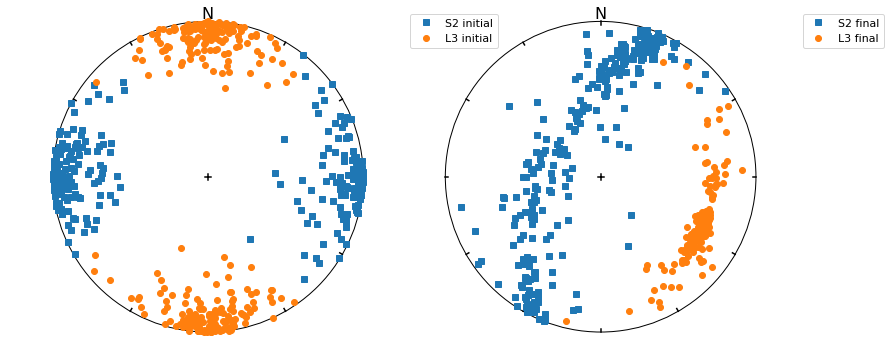

In [7]:
s = StereoNet(ncols=2, figsize=(16,6))
s.pole(S2, label='S2 initial')
s.line(L3, label='L3 initial')
s.active = 1
s.pole(S2.transform(F), label='S2 final')
s.line(L3.transform(F), label='L3 final')

APSG allows to generate animation to visualize progressive deformation and fabric transpozition during deformation.

### Progresive deformation of planar elements

In [8]:
s = StereoNet()
s.pole(Atr.fol, 'go', label='Atr Fol')
for t in tsteps:
    s.pole(S2.transform(L.defgrad(t)), color='C0', animate=True)
anim = s.animate(interval=80)
s.close()
HTML(anim.to_jshtml())

### Progresive deformation of linear elements

In [9]:
print('Progresive deformation of planar elements')
s = StereoNet()
s.line(Atr.lin, 'go', label='Atr Lin')
for t in tsteps:
    s.line(L3.transform(L.defgrad(t)), color='C1', animate=True)
anim = s.animate(interval=80)
s.close()
HTML(anim.to_jshtml())

Progresive deformation of planar elements


Evolution of fabric symmetry and intensity during progressive deformation could be visualized in Vollmer plot or Hsu plot. At first, we generate list of orientation tensors derived from planar and linear elements in indivitual time steps...

In [10]:
OtS2 = [S2.transform(D, norm=True).ortensor for D in L.defgrad(time=tsteps)]
OtL3 = [L3.transform(D, norm=True).ortensor for D in L.defgrad(time=tsteps)]

... and generate plots.

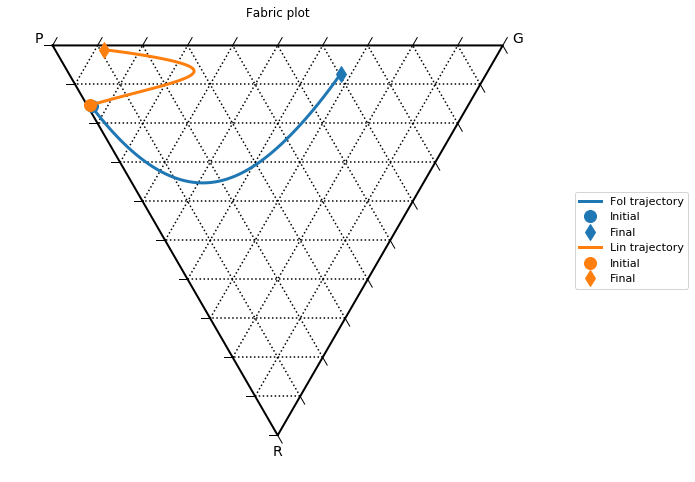

In [11]:
v = VollmerPlot()
v.path(OtS2, '-', color='C0', lw=3, label='Fol trajectory')
v.plot(OtS2[0], 'o', color='C0', ms=12, label='Initial')
v.plot(OtS2[-1], 'd', color='C0', ms=12, label='Final')
v.path(OtL3, '-', color='C1', lw=3, label='Lin trajectory')
v.plot(OtL3[0], 'o', color='C1', ms=12, label='Initial')
v.plot(OtL3[-1], 'd', color='C1', ms=12, label='Final')

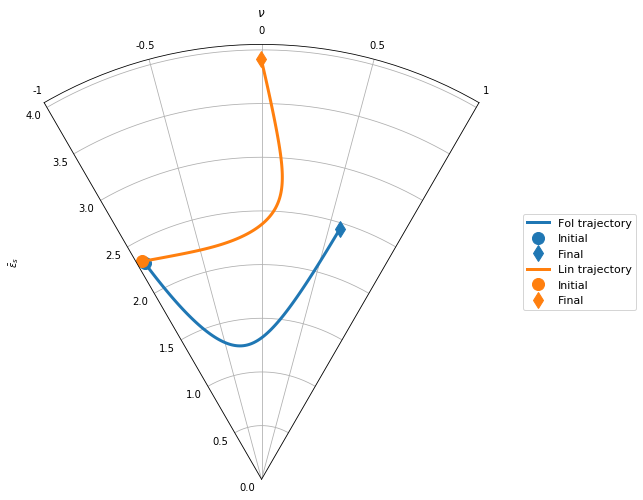

In [12]:
v = HsuPlot()
v.path(OtS2, '-', color='C0', lw=3, label='Fol trajectory')
v.plot(OtS2[0], 'o', color='C0', ms=12, label='Initial')
v.plot(OtS2[-1], 'd', color='C0', ms=12, label='Final')
v.path(OtL3, '-', color='C1', lw=3, label='Lin trajectory')
v.plot(OtL3[0], 'o', color='C1', ms=12, label='Initial')
v.plot(OtL3[-1], 'd', color='C1', ms=12, label='Final')

bla bla bla

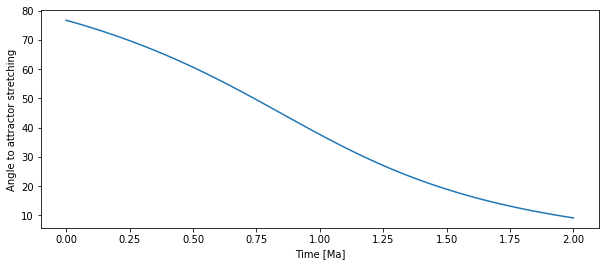

In [13]:
figure(figsize=(10,4))
ang = [L3.transform(D, norm=True).ortensor.eigenlins[0].angle(Atr.lvec) for D in L.defgrad(time=tsteps)]
plot(tsteps/Mas, ang)
xlabel('Time [Ma]')
ylabel('Angle to attractor stretching');

## Retro deformation of surface section

In [14]:
mfg = 12*Vec3(285,0)

In [15]:
V = Group([mfg.transform(D) for D in (-L).defgrad(time=tsteps)])
z = abs(V.proj(Lin(0,90)))
ld = abs(Group([v-mfg-(v-mfg).proj(Lin(0,90)) for v in V]))

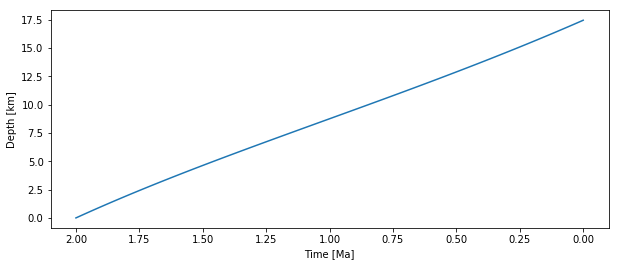

In [16]:
fig, ax = subplots(figsize=(10,4))
ax.plot(tsteps[::-1]/Mas, z)
ax.invert_xaxis()
ax.set_xlabel('Time [Ma]')
ax.set_ylabel('Depth [km]');

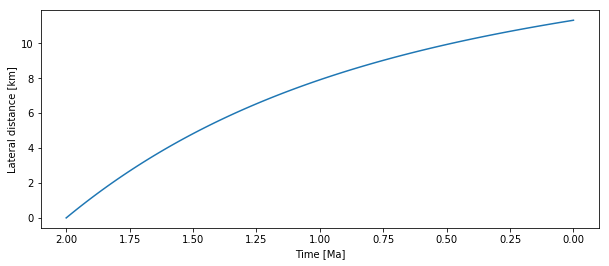

In [17]:
fig, ax = subplots(figsize=(10,4))
ax.plot(tsteps[::-1]/Mas, ld)
ax.invert_xaxis()
ax.set_xlabel('Time [Ma]')
ax.set_ylabel('Lateral distance [km]');